### Objective: To run descriptor pipeline on antibodies from Kraft et al paper. 
The descriptor paper of interest used the heparin binding data from the Kraft et al paper 2020.In this notebook, I am going to calculate my set of descriptors on that set. 

In [19]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from developability.pipeline import run_processing_pipeline
from developability.utils import ls, renumber_pdb

### Load and organize the data. 

In [28]:
desktop = Path().cwd().parent.parent.parent /'Desktop'
lab_file = desktop/'Biophysical:Chemical data for abs/AbClearanceData_Kraft_2020.csv'
lab_df = pd.read_csv(lab_file, names = ['antibody', 'Heparin', 'FcRn', 'year'], skiprows=1)
lab_df.head()

,antibody,Heparin,FcRn,year
0,adalimumab,0.79,1.04,1999.0
1,daclizumab,0.84,0.02,1994.0
2,ganitumab,0.79,3.20,2010.0
3,vedolizumab,0.54,0.23,2008.0
4,natalizumab,0.54,0.27,1998.0


#### Copy data from location to another location. 

In [3]:
ab_dir = desktop/'ab_structures'
renumbered_ab_dir = desktop/'renumbered_abs'
if not renumbered_ab_dir.exists(): 
    renumbered_ab_dir.mkdir()

# copy and renumber


abs = set(ls(ab_dir, True))
not_in_set = []
cant_renumber = []
renumbered =[]
for ab in lab_df.Ab: 
    fname = f'{ab}.pdb'
    if fname in abs: 
        try: 
            renumber_pdb(ab_dir/fname, renumbered_ab_dir/fname)
            renumbered.append(ab)
        except ValueError:
            cant_renumber.append(ab) 
    else: 
        not_in_set.append(ab)

In [5]:
descriptors = []
n = len(renumbered)
for ab in tqdm(renumbered, total = n): 
    ab_pdb = renumbered_ab_dir/f'{ab}.pdb'
    descriptors.append(run_processing_pipeline(ab_pdb))

  0%|          | 0/128 [00:00<?, ?it/s]

Starting pdb4amber with /Users/ChristopherRivera/Desktop/renumbered_abs/adalimumab.pdb. 

2023-10-09 12:41:57,983 [MainThread  ] [INFO ]  Executing biobb_amber.pdb4amber.pdb4amber_run Version: 4.1.0
2023-10-09 12:41:58,164 [MainThread  ] [INFO ]  Copy: /Users/ChristopherRivera/Desktop/renumbered_abs/adalimumab.pdb to /Users/ChristopherRivera/Projects/developability/Notebooks/f991fbc7-e8f3-4543-8db2-9f7936e64e46
2023-10-09 12:41:58,192 [MainThread  ] [INFO ]  Creating 6f4f9e7b-45f0-409b-9d50-d475bbbe3776 temporary folder
2023-10-09 12:41:58,210 [MainThread  ] [INFO ]  pdb4amber -i /Users/ChristopherRivera/Projects/developability/Notebooks/f991fbc7-e8f3-4543-8db2-9f7936e64e46/adalimumab.pdb -o /Users/ChristopherRivera/Projects/developability/Notebooks/f991fbc7-e8f3-4543-8db2-9f7936e64e46/pdb4amber.pdb -y 

2023-10-09 12:41:59,651 [MainThread  ] [INFO ]  Exit code 0

2023-10-09 12:41:59,652 [MainThread  ] [INFO ]  
Summary of pdb4amber for: /Users/ChristopherRivera/Projects/developability

In [12]:
descriptors_df = pd.concat(descriptors).reset_index().rename({'index':'antibody'}, axis = 1)
descriptors_df.to_csv(renumbered_ab_dir/'descriptors.csv', index = False)
descriptors_df.head()

,antibody,HCDR1_APBS_pos,LCDR1_APBS_pos,HCDR2_APBS_pos,LCDR2_APBS_pos,HCDR3_APBS_pos,LCDR3_APBS_pos,HFR1_APBS_pos,LFR1_APBS_pos,HFR2_APBS_pos,...,LFR2_APBS_net,HFR3_APBS_net,LFR3_APBS_net,HFR4_APBS_net,LFR4_APBS_net,HFR5_APBS_net,LFR5_APBS_net,CDR_APBS_pos,CDR_APBS_neg,CDR_APBS_net
0,adalimumab,0.000000,74.602083,0.000000,0.000000,72.789843,0.000000,153.383089,20.187507,1702.70668,...,0.000000,0.000000,-748.778909,0.0,0.000000,0.0,0.0,2082.976016,-1474.165517,608.810499
1,daclizumab,0.000000,0.000000,16.410573,496.853471,0.000000,0.000000,194.535384,1490.650847,0.00000,...,-38.688851,758.857720,251.433303,0.0,259.370668,0.0,0.0,3517.979296,-148.965592,3369.013704
2,ganitumab,0.000000,1784.197304,0.000000,541.321847,0.000000,101.209025,28.650125,1268.899022,0.00000,...,1566.472993,326.574716,0.000000,0.0,0.000000,0.0,0.0,5662.864570,-420.970374,5241.894197
3,vedolizumab,128.403964,141.894377,0.000000,0.000000,22.714955,0.000000,362.117973,253.167809,0.00000,...,255.914384,-116.203043,0.000000,0.0,0.000000,0.0,0.0,1230.650483,-2715.406171,-1484.755688
4,natalizumab,0.000000,95.545055,2053.962629,0.000000,176.628811,0.000000,42.893355,1207.776876,0.00000,...,0.000000,1223.740443,1002.670235,0.0,145.016342,0.0,0.0,5948.233746,-98.765519,5849.468227


### Now look at the Heparin retention

In [33]:
df = (lab_df[['antibody', 'Heparin', 'FcRn']].merge(descriptors_df, on = 'antibody')
      .set_index('antibody')
      )
df.head()

,Heparin,FcRn,HCDR1_APBS_pos,LCDR1_APBS_pos,HCDR2_APBS_pos,LCDR2_APBS_pos,HCDR3_APBS_pos,LCDR3_APBS_pos,HFR1_APBS_pos,LFR1_APBS_pos,...,LFR2_APBS_net,HFR3_APBS_net,LFR3_APBS_net,HFR4_APBS_net,LFR4_APBS_net,HFR5_APBS_net,LFR5_APBS_net,CDR_APBS_pos,CDR_APBS_neg,CDR_APBS_net
antibody,,,,,,,,,,,,,,,,,,,,,
adalimumab,0.79,1.04,0.000000,74.602083,0.000000,0.000000,72.789843,0.000000,153.383089,20.187507,...,0.000000,0.000000,-748.778909,0.0,0.000000,0.0,0.0,2082.976016,-1474.165517,608.810499
daclizumab,0.84,0.02,0.000000,0.000000,16.410573,496.853471,0.000000,0.000000,194.535384,1490.650847,...,-38.688851,758.857720,251.433303,0.0,259.370668,0.0,0.0,3517.979296,-148.965592,3369.013704
ganitumab,0.79,3.20,0.000000,1784.197304,0.000000,541.321847,0.000000,101.209025,28.650125,1268.899022,...,1566.472993,326.574716,0.000000,0.0,0.000000,0.0,0.0,5662.864570,-420.970374,5241.894197
vedolizumab,0.54,0.23,128.403964,141.894377,0.000000,0.000000,22.714955,0.000000,362.117973,253.167809,...,255.914384,-116.203043,0.000000,0.0,0.000000,0.0,0.0,1230.650483,-2715.406171,-1484.755688
natalizumab,0.54,0.27,0.000000,95.545055,2053.962629,0.000000,176.628811,0.000000,42.893355,1207.776876,...,0.000000,1223.740443,1002.670235,0.0,145.016342,0.0,0.0,5948.233746,-98.765519,5849.468227


In [99]:
df.to_csv(renumbered_ab_dir/'antibody_descriptor_results.csv')

In [75]:
def plot_correlogram(d, cmap='RdBu', method = 'pearson'):

    # Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

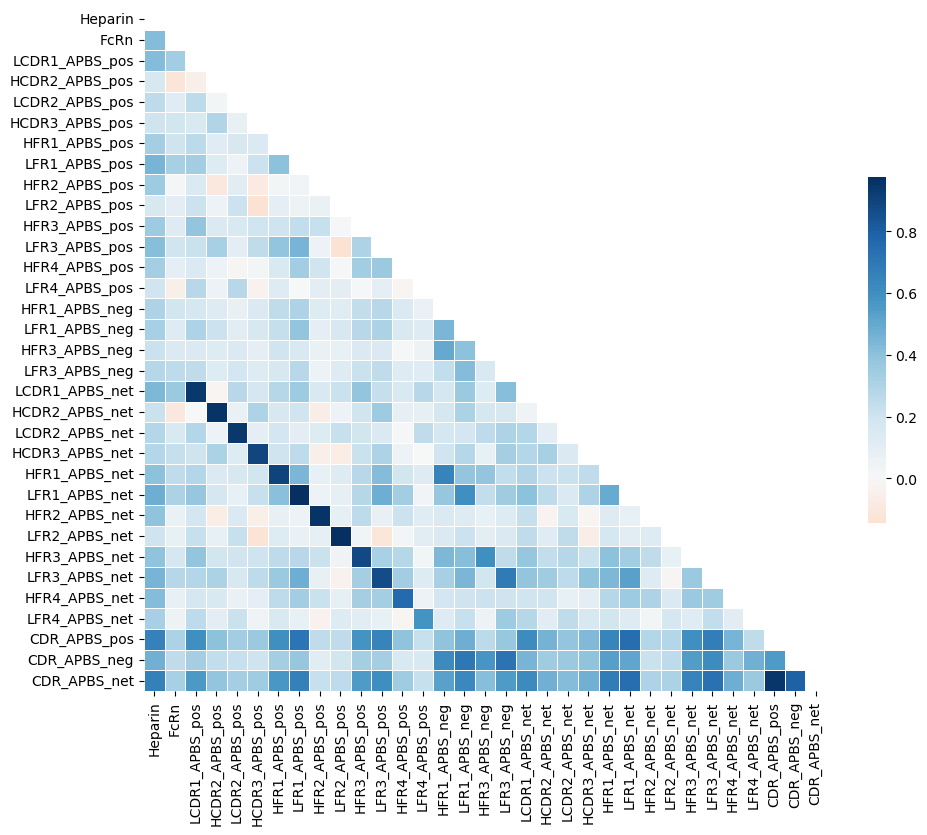

In [76]:
df_subset = df[df.columns[(df==0).mean()<0.75]]
plot_correlogram(df_subset)

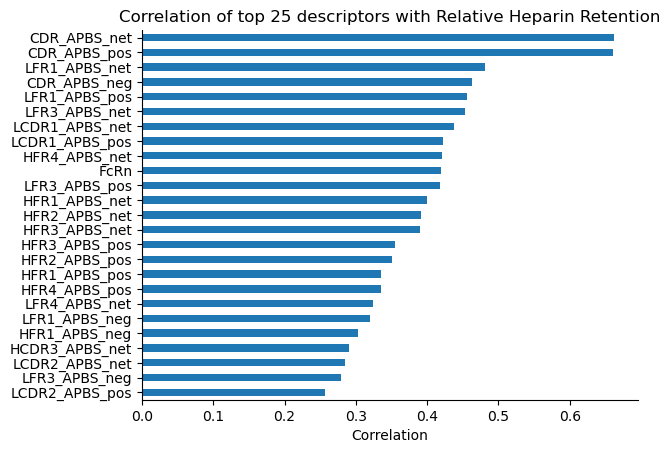

In [81]:
corr = df_subset.corr()
heparin_corr = corr.loc['Heparin'].sort_values(ascending =False)
n = 26
top_heparin = heparin_corr.head(n).tail(n-1)
ax = top_heparin.sort_values().plot(kind = 'barh')
ax.set(title='Correlation of top 25 descriptors with Relative Heparin Retention', xlabel ='Correlation')
sns.despine()

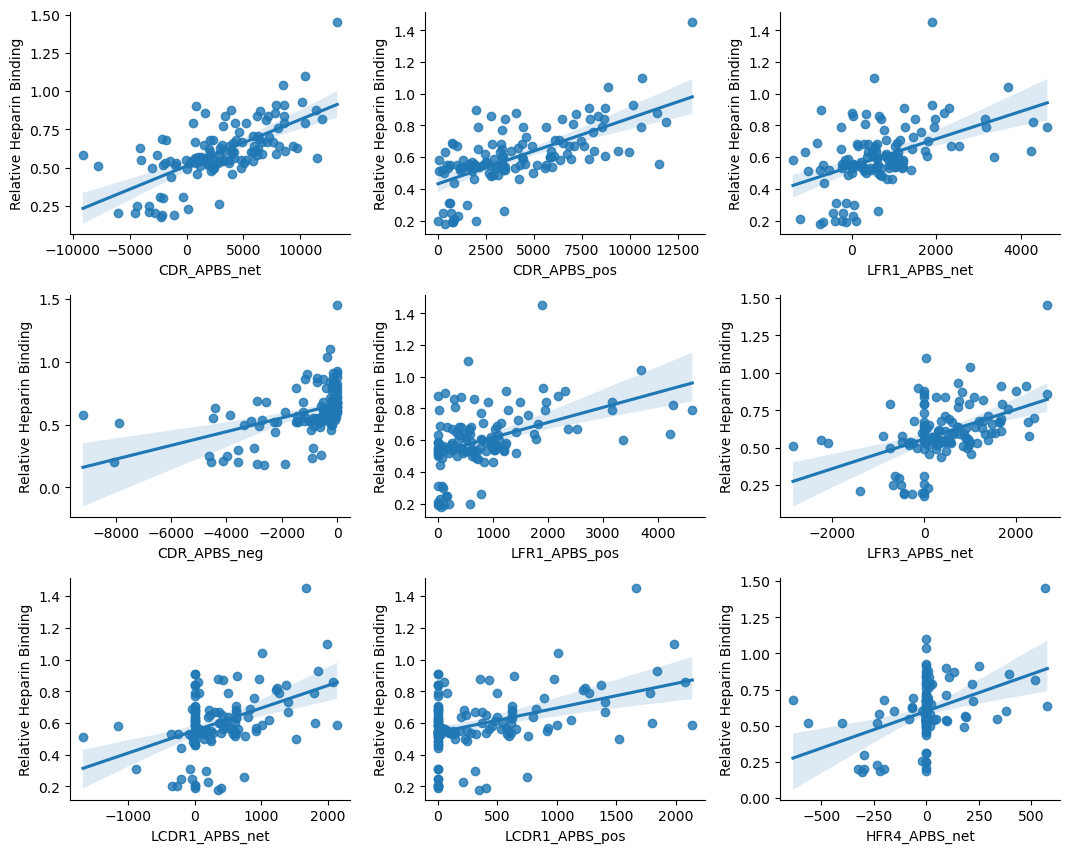

In [86]:
n = 3
width = 3.6
height = 0.8*width
fig, axes = plt.subplots(3,3, figsize = (n*width,n*height))

axes = np.ravel(axes)

for i in range(n*n): 
    x = top_heparin.index[i]

    ax = sns.regplot(data = df, x =x, y= 'Heparin' , ax = axes[i])
    ax.set(ylabel = 'Relative Heparin Binding')

sns.despine()
plt.tight_layout()

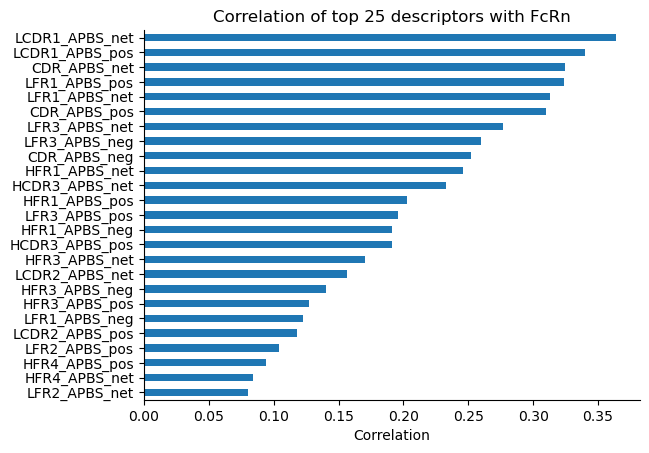

In [92]:

FcRn_corr = corr.loc['FcRn'].sort_values(ascending =False)
n = 27
top_FcRn = FcRn_corr.head(n).tail(n-2)
ax = top_FcRn.sort_values().plot(kind = 'barh')
ax.set(title='Correlation of top 25 descriptors with FcRn', xlabel ='Correlation')
sns.despine()

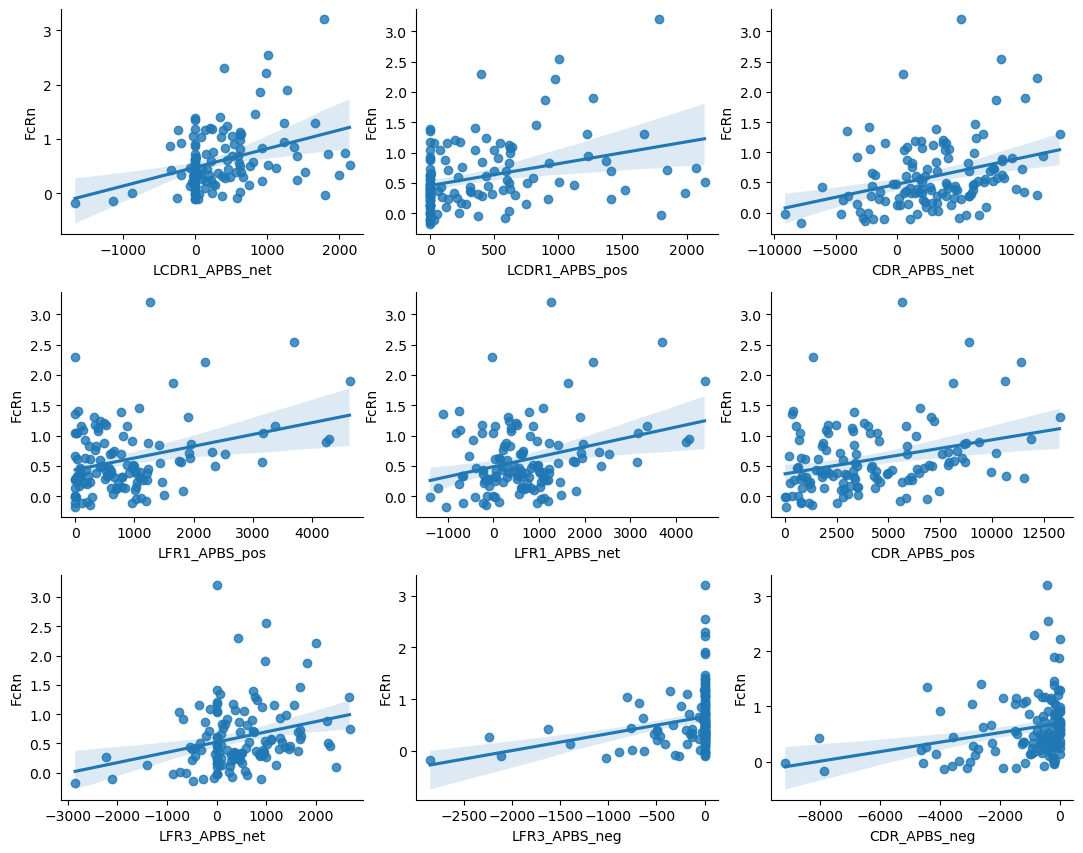

In [94]:
n = 3
width = 3.6
height = 0.8*width
fig, axes = plt.subplots(3,3, figsize = (n*width,n*height))

axes = np.ravel(axes)

for i in range(n*n): 
    x = top_FcRn.index[i]

    ax = sns.regplot(data = df, x =x, y= 'FcRn' , ax = axes[i])
    ax.set(ylabel = 'FcRn')

sns.despine()
plt.tight_layout()